<a href="https://colab.research.google.com/github/Yuanxyyds/JSC270_HW2_2022_Steven_Liu/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PART II

# Import Libraries

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats.stats import pearsonr
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Importing Data

In [130]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

# Initial Data Exploration

1. Check the columns of your data. Are they the expected data types based on their descriptions in this text file description of the data?


In [131]:
income94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           32561 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          32561 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      32561 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


2. How are missing values represented in this data? Cast missing values to np.nan, if necessary. Count the number of missing values in each column.

In [132]:
income94 = income94.replace(' ?', np.nan)
income94.isna().sum().sum()

4262

In [133]:
income94.isna().sum()

age                      0
workclass             1836
fnlwgt                   0
education                0
education_num            0
marital_status           0
occupation            1843
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hours_per_week           0
native_country         583
gross_income_group       0
dtype: int64

3.	Individually plot the distributions of capital_gain and capital_loss.  Do you think these variables should be transformed to categorical variables? Why or why not? If yes, create a new variable(s) with your suggested transformation and plot or describe in a table the distribution of the new categorical variable(s).

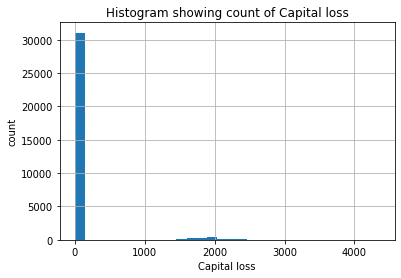

In [134]:
income94['capital_loss'].hist(bins =30)
plt.title('Histogram showing count of Capital loss')
plt.xlabel('Capital loss')
plt.ylabel('count')
plt.show()

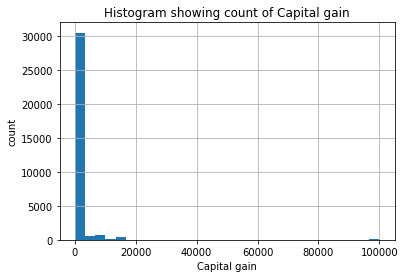

In [135]:
income94['capital_gain'].hist(bins =30)
plt.title('Histogram showing count of Capital gain')
plt.xlabel('Capital gain')
plt.ylabel('count')
plt.show()

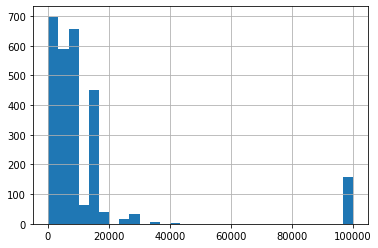

In [136]:
income94[income94.capital_gain > 0]['capital_gain'].hist(bins =30)

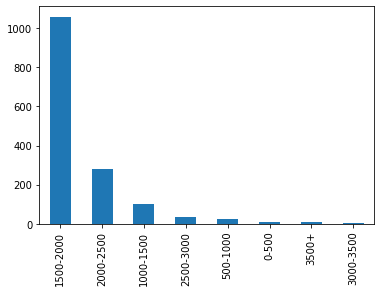

In [137]:
def func(x):
    if x == 0:
        return 'zero'
    elif 0 < x <= 500:
        return '0-500'
    elif 500 < x <= 1000:
        return '500-1000'
    elif 1000 < x <= 1500:
        return '1000-1500'
    elif 1500 < x <= 2000:
        return '1500-2000'
    elif 2000 < x <= 2500:
        return '2000-2500'
    elif 2500 < x <= 3000:
        return '2500-3000'
    elif 3000 < x <= 3500:
        return '3000-3500'
    else:
        return '3500+'
income94['capital_loss_cat'] = income94['capital_loss'].apply(func)
income94[income94.capital_loss_cat != 'zero']['capital_loss_cat'].sort_values()\
.value_counts().plot(kind = 'bar')

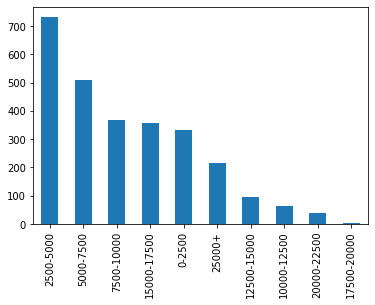

In [138]:
def func2(x):
    if x == 0:
        return 'zero'
    elif 0 < x <= 2500:
        return '0-2500'
    elif 2500 < x <= 5000:
        return '2500-5000'
    elif 5000 < x <= 7500:
        return '5000-7500'
    elif 7500 < x <= 10000:
        return '7500-10000'
    elif 10000 < x <= 12500:
        return '10000-12500'
    elif 12500 < x <= 15000:
        return '12500-15000'
    elif 15000 < x <= 17500:
        return '15000-17500'
    elif 17500 < x <= 20000:
        return '17500-20000'
    elif 20000 < x <= 22500:
        return '20000-22500'
    elif 22500 < x <= 25000:
        return '22500-25000'
    else:
        return '25000+'
income94['capital_gain_cat'] = income94['capital_gain'].apply(func2)
income94[income94.capital_gain_cat != 'zero']['capital_gain_cat']\
.value_counts().plot(kind = 'bar')

4. The sampling weights in the dataset are contained in the variable fnlwgt. The weights indicate the share of the population that sample represents based on location (and sometimes, other factors).  More information is provided in this text file description of the data. Plot or numerically explore the distribution of fnlwgt. Is the variable symmetrically distributed? Compare the distribution of this variable between men and women and comment on any trends you notice. Should outliers be excluded? If you think yes, set the fnlwgt values for those you deem to be outliers as missing for the remainder of your analyses.


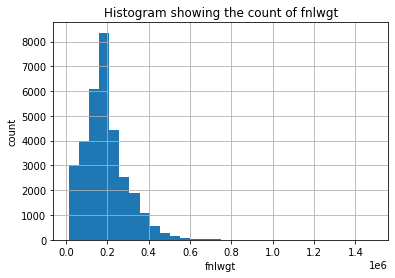

In [139]:
income94['fnlwgt'].hist(bins =30)
plt.title('Histogram showing the count of fnlwgt')
plt.xlabel('fnlwgt')
plt.ylabel('count')
plt.show()

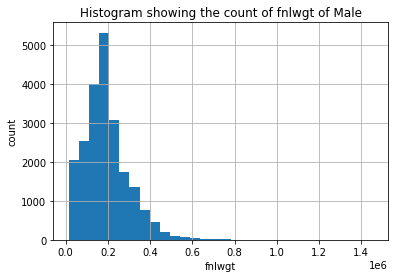

In [140]:
income94[income94.sex == ' Male']['fnlwgt'].hist(bins =30)
plt.title('Histogram showing the count of fnlwgt of Male')
plt.xlabel('fnlwgt')
plt.ylabel('count')
plt.show()

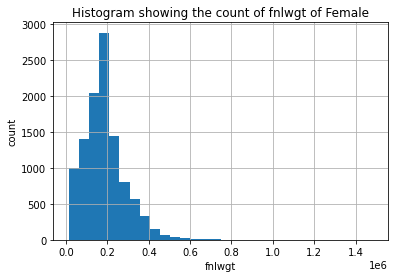

In [141]:
income94[income94.sex == ' Female']['fnlwgt'].hist(bins =30)
plt.title('Histogram showing the count of fnlwgt of Female')
plt.xlabel('fnlwgt')
plt.ylabel('count')
plt.show()

In [142]:
income94['fnlwgt'] = income94['fnlwgt'].apply(lambda x: np.nan if x > 8000000 else x)
# Select only data below 8000000 and make np.nan otherwise.

# Correlation

1.	Find the correlations between age, education_num, and hours_per_week. 


In [143]:
income94.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


a. Do any of the variables appear to be correlated? How did you make your assessment?

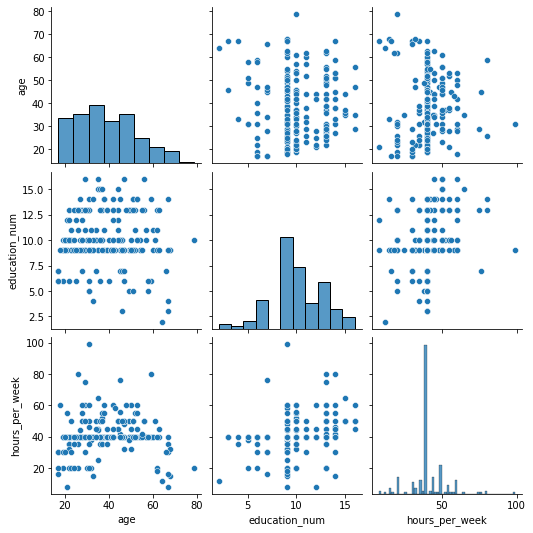

In [144]:
columns_drop = ["fnlwgt","capital_gain","capital_loss"]
rng = np.random.RandomState(0)
indices = rng.choice(np.arange(income94.shape[0]),size=200,replace=False)
income_sub = income94.iloc[indices].drop(columns = columns_drop)
sns.pairplot(data = income_sub)


b. Statistically test any variable pairs with a correlation coefficient > |0.1| for its difference from 0 and report your result. Is the direction and significance of your finding as expected?

In [145]:
pearsonr(income94['age'], income94['education_num'])

(0.03652718946410611, 4.305718002102917e-11)

In [146]:
pearsonr(income94['age'], income94['hours_per_week'])

(0.06875570750955737, 2.011285562161161e-35)

In [147]:
pearsonr(income94['hours_per_week'], income94['education_num'])

(0.1481227326229122, 4.2366474790836004e-159)






c. How does the correlation (and its significance) between education_num and  age compare between male and female participants? Is this expected?




In [148]:
pearsonr(income94[income94.sex == ' Female']['age'], income94[income94.sex == ' Female']['education_num'])

(-0.017899243935447704, 0.06322895030804963)

In [149]:
pearsonr(income94[income94.sex == ' Male']['age'], income94[income94.sex == ' Male']['education_num'])

(0.060486409198268254, 4.0229868301718123e-19)

d. Compute the covariance matrix for education_num and hours_per_week. What conclusions can you draw from the covariance matrix?

In [150]:
income94.drop(columns= ['age','fnlwgt','capital_gain','capital_loss']).cov()

,education_num,hours_per_week
education_num,6.618890,4.705338
hours_per_week,4.705338,152.458995


# Regression

1. Fit a linear regression with hours_per_week as the dependent variable and sex as the independent variable.

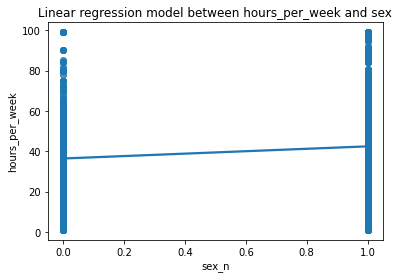

In [151]:
reg = smf.ols('hours_per_week~sex', data = income94).fit()
income94['sex_n'] = income94['sex'].apply(lambda x: 1 if x == ' Male' else 0)
sns.regplot(y='hours_per_week', x='sex_n', data = income94)
plt.title('Linear regression model between hours_per_week and sex')
plt.show()

a. Do men tend to work more hours? 

In [152]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1807.
Date:                Mon, 14 Feb 2022   Prob (F-statistic):               0.00
Time:                        09:06:56   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32559   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       36.4104      0.116    314.412      0.000      36.183      36.637
sex[T. Male]     6.0177      0.142     42.510      0.000       5.740       6.295
==============================================================================
Omnibus:                     2649.390   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13090.867
Skew:                           0.239   Prob(JB):                         0.00
Kurtosis:                       6.069   Cond. No.                         3.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

b. Add education_num as a control variable, does the trend in hours worked by men vs women remain the same? Is the coefficient for education_num statistically significant? What is the 95% confidence interval?

In [153]:
reg2 = smf.ols('hours_per_week~sex + education_num', data = income94).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         hours_per_week   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1295.
Date:                Mon, 14 Feb 2022   Prob (F-statistic):               0.00
Time:                        09:06:58   Log-Likelihood:            -1.2680e+05
No. Observations:               32561   AIC:                         2.536e+05
Df Residuals:                   32558   BIC:                         2.536e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        29.4106      0.281    104.556      0.000      28.859      29.962
sex[T. Male]      5.9709      0.140     42.653      0.000       5.697       6.245
education_num     0.6975      0.026     27.244      0.000       0.647       0.748
==============================================================================
Omnibus:                     2783.881   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14492.060
Skew:                           0.247   Prob(JB):                         0.00
Kurtosis:                       6.231   Cond. No.                         45.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

c. Now add gross_income_group as a binary variable in the model and compare this model with the models including (i) only sex and (ii) sex and education_num.  Write down the interpretation for the coefficient for sex in each model.  What statistic(s) can help to decide which model is the “best”?  How do the three models compare?

In [154]:
income94['gross_income_group_bi'] = income94['gross_income_group'].apply(lambda x: 0 if x == ' <=50K' else 1)
reg3 = smf.ols('hours_per_week~sex + education_num + gross_income_group_bi', data = income94).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         hours_per_week   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1130.
Date:                Mon, 14 Feb 2022   Prob (F-statistic):               0.00
Time:                        09:07:03   Log-Likelihood:            -1.2643e+05
No. Observations:               32561   AIC:                         2.529e+05
Df Residuals:                   32557   BIC:                         2.529e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                31.4218      0.288    109.184      0.000      30.858      31.986
sex[T. Male]              5.1010      0.142     35.907      0.000       4.823       5.379
education_num             0.4478      0.027     16.632      0.000       0.395       0.501
gross_income_group_bi     4.5175      0.166     27.229      0.000       4.192       4.843
==============================================================================
Omnibus:                     2984.190   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15467.160
Skew:                           0.296   Prob(JB):                         0.00
Kurtosis:                       6.324   Cond. No.                         48.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

PART III

In [159]:
old_group = income94[income94.age >= 50]
reg4 = smf.ols('hours_per_week~age', data = old_group).fit()
reg4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         hours_per_week   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     1024.
Date:                Mon, 14 Feb 2022   Prob (F-statistic):          5.72e-210
Time:                        09:26:20   Log-Likelihood:                -28006.
No. Observations:                7062   AIC:                         5.602e+04
Df Residuals:                    7060   BIC:                         5.603e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     77.5402      1.200     64.618      0.000      75.188      79.893
age           -0.6499      0.020    -32.002      0.000      -0.690      -0.610
==============================================================================
Omnibus:                      795.531   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3073.547
Skew:                           0.520   Prob(JB):                         0.00
Kurtosis:                       6.060   Cond. No.                         467.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

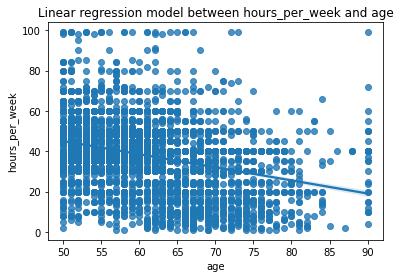

In [160]:
sns.regplot(y='hours_per_week', x='age', data = old_group)
plt.title('Linear regression model between hours_per_week and age')
plt.show()